In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [68]:
df = pd.read_csv('../data/cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.111,0.116,0.244,0.139,0.173,0.056,1.176,1.256,7.673,158.70,0.010,0.029,0.052,0.025,0.011,0.004,25.450,26.40,166.10,2027.0,0.141,0.211,0.411,0.222,0.206,0.071,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,0.175,0.055,0.765,2.463,5.203,99.04,0.006,0.024,0.040,0.017,0.019,0.002,23.690,38.25,155.00,1731.0,0.117,0.192,0.322,0.163,0.257,0.066,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.085,0.102,0.093,0.053,0.159,0.056,0.456,1.075,3.425,48.55,0.006,0.037,0.047,0.016,0.013,0.004,18.980,34.12,126.70,1124.0,0.114,0.309,0.340,0.142,0.222,0.078,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.118,0.277,0.351,0.152,0.240,0.070,0.726,1.595,5.772,86.22,0.007,0.062,0.071,0.017,0.023,0.006,25.740,39.42,184.60,1821.0,0.165,0.868,0.939,0.265,0.409,0.124,NaN


In [69]:

pd.set_option('max_columns',33)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,NaN


In [70]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [71]:
df.diagnosis.unique()


array(['M', 'B'], dtype=object)

In [72]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [73]:
pd.set_option('precision',3)


In [74]:
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


In [75]:
# Getting Features:-
cols = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean']
x = df[cols]
# x = df.drop(columns = 'diagnosis')

# Getting Predicting Value:-

y = df['diagnosis']


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=46)
x_test.shape

(114, 5)

In [77]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)


In [78]:
def Classification_Models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import classification_report
    from sklearn.metrics import plot_confusion_matrix    
  


    # Initializing models:-

    logisreg = LogisticRegression()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()

     # Fitting Models
    logisreg.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)

    # Getting Predicting Values:-

    logi_pred = logisreg.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)

    print("Accuracy of Support Vector Classifier:",acc_svc*100,'\n')
    print(classification_report(y_test,svm_pred))
    disp = plot_confusion_matrix(svmodel, xt, yt, display_labels=['normal', 'diseases'], cmap=plt.cm.Blues)
    disp.ax_.set_title('Support Vector Classifier:')
    print('Confusion Matrix')
    plt.show()
    joblib.dump(svmodel,"../Breast_Cancer API/cancer_model.pkl")

Accuracy of Support Vector Classifier: 92.98245614035088 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        70
           1       0.95      0.86      0.90        44

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix


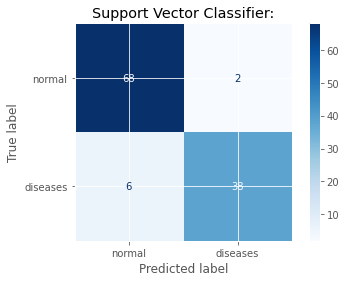

In [79]:
Classification_Models(x_train,y_train,x_test,y_test)